In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#############################################

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [3]:
df_train = pd.read_csv(r'C:\Users\hp\OneDrive\Рабочий стол\Netology AB\FE\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
lst = [i for i in df_train.columns if str(df_train[i].dtype) != 'object'][1:]

lst

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [5]:
df_train_1 = df_train[lst].dropna(how='any', axis=0).copy()

In [6]:
df_train_1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [7]:
list(df_train_1.columns)[1:]

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df_train_1[list(df_train_1.columns)[1:]],
    df_train_1['Survived'], 
    test_size = 0.2, random_state=42)

In [9]:
x_train

,Pclass,Age,SibSp,Parch,Fare
328,3,31.0,1,1,20.5250
73,3,26.0,1,0,14.4542
253,3,30.0,1,0,16.1000
719,3,33.0,0,0,7.7750
666,2,25.0,0,0,13.0000
...,...,...,...,...,...
92,1,46.0,1,0,61.1750
134,2,25.0,0,0,13.0000
337,1,41.0,0,0,134.5000
548,3,33.0,1,1,20.5250


In [10]:
model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [11]:
ROCS = {}

In [12]:
ROCS['full_cut'] = roc_auc_score(y_test, y_pred)

f'ROC-AUC = {roc_auc_score(y_test, y_pred):.2%}'

'ROC-AUC = 65.74%'

In [13]:
ROCS

{'full_cut': 0.6574302134646962}

In [14]:
# Удаляются некоррелированные данные (если оставить 2 наиболее коррелированных - будет выборка без пропусков)
df_train_1.corr()[['Survived']].sort_values(by='Survived')

,Survived
Pclass,-0.359653
Age,-0.077221
SibSp,-0.017358
Parch,0.093317
Fare,0.268189
Survived,1.000000


In [15]:
lst_1 = [i for i in list(df_train_1.corr()[['Survived']].query('Survived>0.1 or Survived<-0.1').T.columns)]

df_train_2 = df_train[lst_1]

x_train, x_test, y_train, y_test = train_test_split(
    df_train_2[list(df_train_2.columns)[1:]],
    df_train_2['Survived'], 
    test_size = 0.2, random_state=42)

model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

ROCS['corr_0_1'] = roc_auc_score(y_test, y_pred)

f'ROC-AUC = {roc_auc_score(y_test, y_pred):.2%}'

'ROC-AUC = 67.38%'

In [16]:
lst_2 = [i for i in list(df_train_1.corr()[['Survived']].query('Survived>0.06 or Survived<-0.06').T.columns)]

lst_2

['Survived', 'Pclass', 'Age', 'Parch', 'Fare']

In [17]:
df_train_3 = df_train[lst_2]#.dropna(how='any', axis=0).copy()

In [18]:
df_train_3.dropna().count() / df_train_3.count()

Survived    0.801347
Pclass      0.801347
Age         1.000000
Parch       0.801347
Fare        0.801347
dtype: float64

In [19]:
#Пустых значений нет - потерь нет
f'При удалении теряется {min(df_train_3.dropna().count() / df_train_3.count() - 1):.2%} строк'

'При удалении теряется -19.87% строк'

In [20]:
np.random.randint(df_train_3.Age.dropna().min(), df_train_3.Age.dropna().max())

28

In [21]:
def rndm():
    return np.random.randint(df_train_3.Age.dropna().min(), df_train_3.Age.dropna().max())

dct_metrics = {'Среднее':df_train_3.Age.dropna().mean(),
               'Константа': 25,
               'Случайное': rndm()
              }

dct_metrics['Случайное']

16

In [22]:
df_train_3_1 = df_train_3.fillna(
    df_train_3.Age.dropna().mean()
)

In [23]:
for met in dct_metrics.keys():
    print(met)

Среднее
Константа
Случайное


In [24]:
for met in dct_metrics.keys():
    df_train_3_1 = df_train_3.fillna(
        dct_metrics[met]
    )
    
    x_train, x_test, y_train, y_test = train_test_split(
        df_train_3_1[list(df_train_3_1.columns)[1:]],
        df_train_3_1['Survived'], 
        test_size = 0.2, random_state=42)
    
    model = LogisticRegression(random_state=0)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    ROCS[f'metric_{met}'] = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC metric_{met} = {roc_auc_score(y_test, y_pred):.2%}')

ROC-AUC metric_Среднее = 71.31%
ROC-AUC metric_Константа = 70.64%
ROC-AUC metric_Случайное = 72.27%


In [25]:
df_train

lst_4_1 = [i for i in df_train.columns if str(df_train[i].dtype) == 'object' and i not in ('Ticket', 'Name', 'Cabin')]
lst_4_2 = [i for i in df_train.columns if str(df_train[i].dtype) != 'object'][1:]

lst_4_1, lst_4_2

(['Sex', 'Embarked'], ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [26]:
df_train_4 = df_train[lst_4_2].join(
    pd.get_dummies(
        df_train[lst_4_1]
    )).fillna(dct_metrics['Среднее'])

df_train_4

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    df_train_4[list(df_train_4.columns)[1:]],
    df_train_4['Survived'], 
    test_size = 0.2, random_state=42)

model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

ROCS['corr_dummies'] = roc_auc_score(y_test, y_pred)

f'ROC-AUC = {roc_auc_score(y_test, y_pred):.2%}'

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


'ROC-AUC = 79.34%'

Pclass


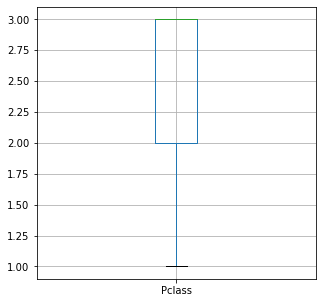

Age


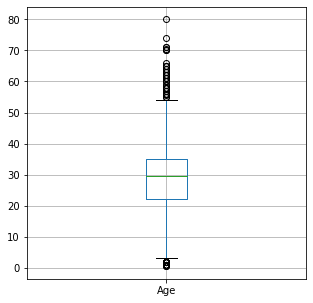

SibSp


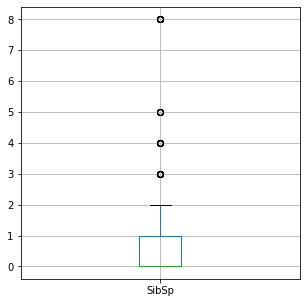

Parch


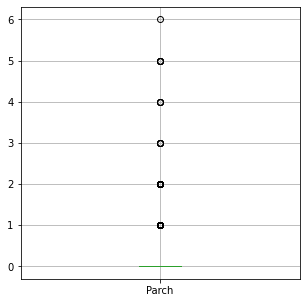

Fare


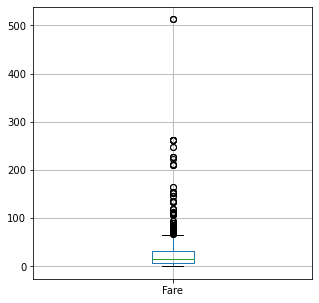

Sex_female


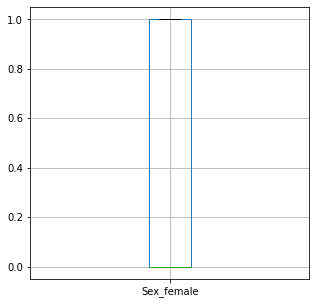

Sex_male


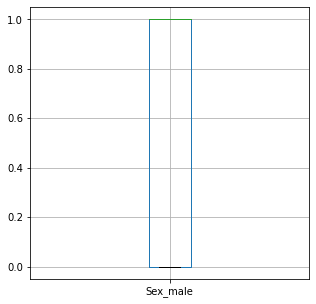

Embarked_C


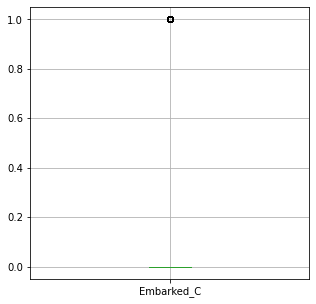

Embarked_Q


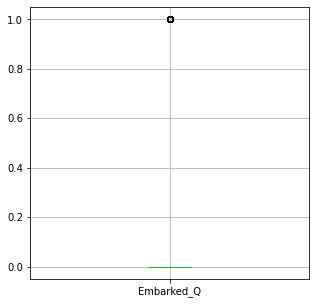

Embarked_S


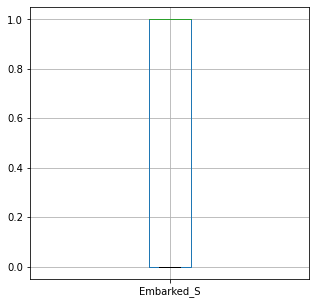

In [28]:
for col in df_train_4.columns[1:]:
    print(col)
    df_train_4[[col]].boxplot(figsize=(5,5))
    plt.show()

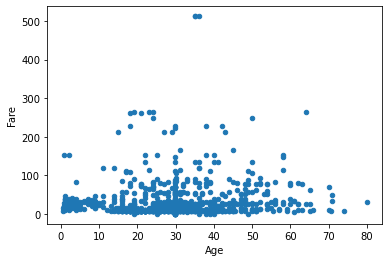

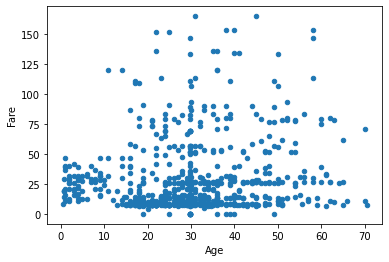

In [35]:
#К выбросам можно привести редкие группы посетителей с Fare больше 200 и возрастом больше 71 года, а также дети с высоким Fare
df_train_4.plot.scatter('Age', 'Fare');
df_train_4.query('Fare < 200 and Age < 71 and not (Age < 10 and Fare > 75)').plot.scatter('Age', 'Fare');

In [36]:
#Корреляция показывает, что наибольшее влияние оказывают пол, Pclass.
#В меньшей степени Fare, Embarked и Age
df_train_4.corr().sort_values(by='Survived')['Survived']

Sex_male     -0.543351
Pclass       -0.338481
Embarked_S   -0.155660
Age          -0.069809
SibSp        -0.035322
Embarked_Q    0.003650
Parch         0.081629
Embarked_C    0.168240
Fare          0.257307
Sex_female    0.543351
Survived      1.000000
Name: Survived, dtype: float64

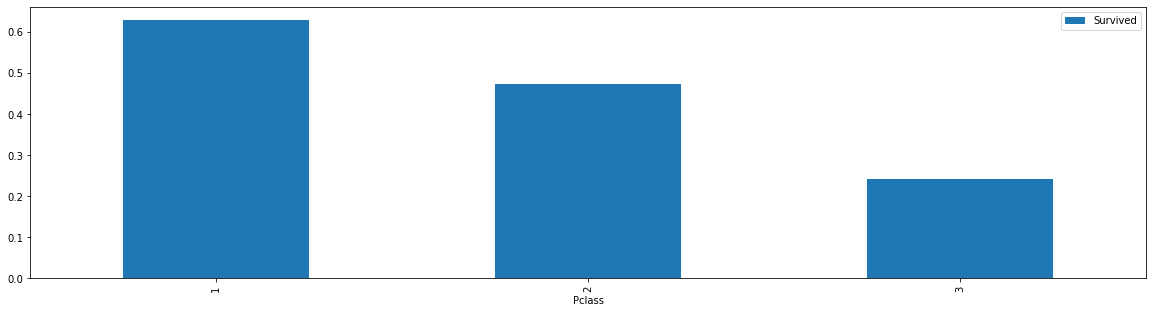

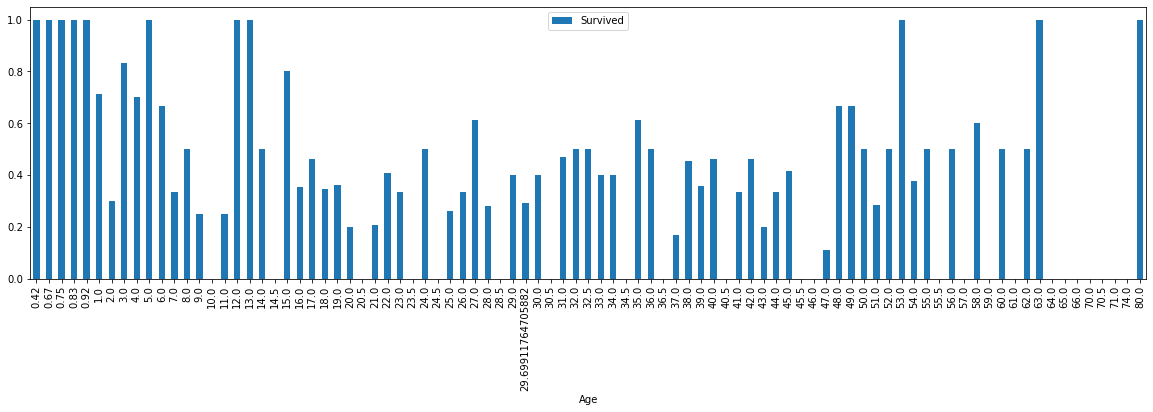

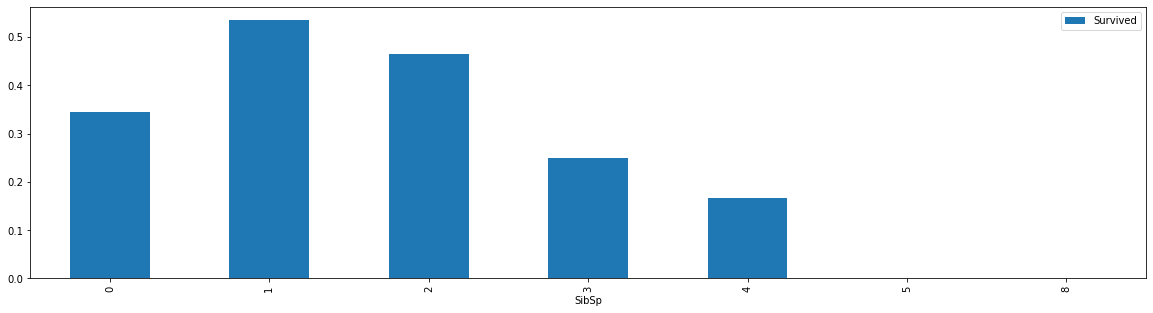

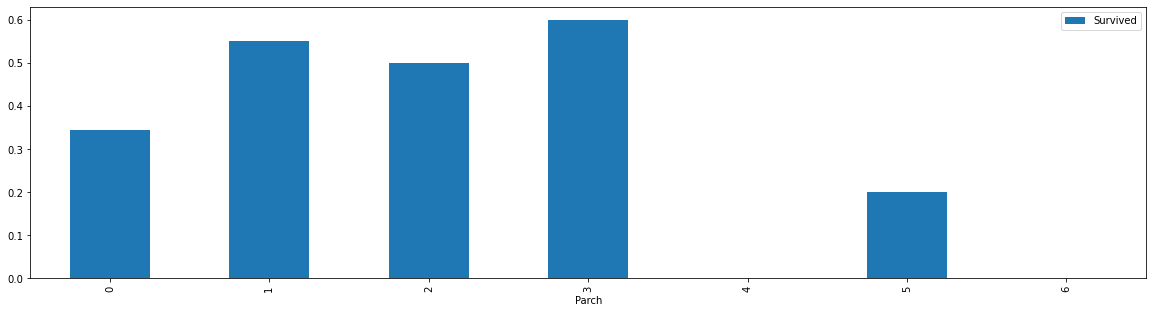

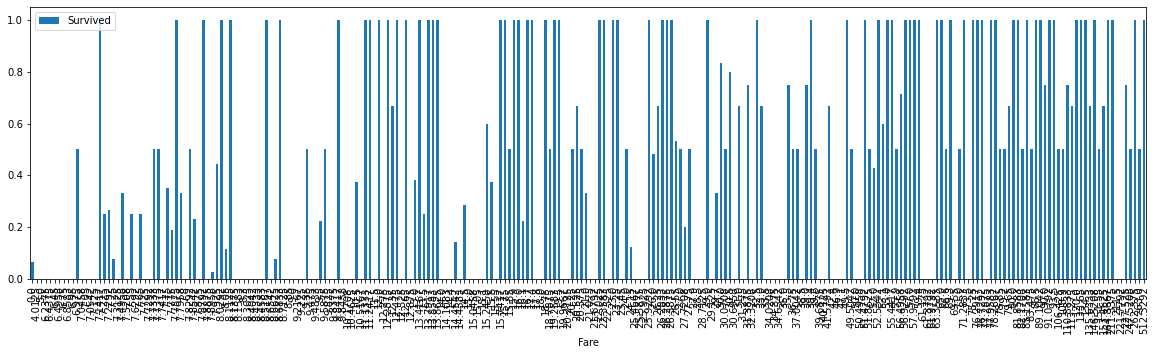

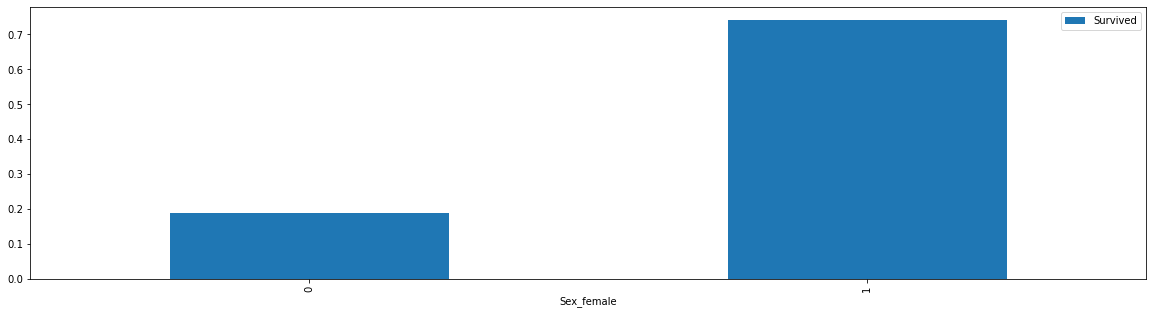

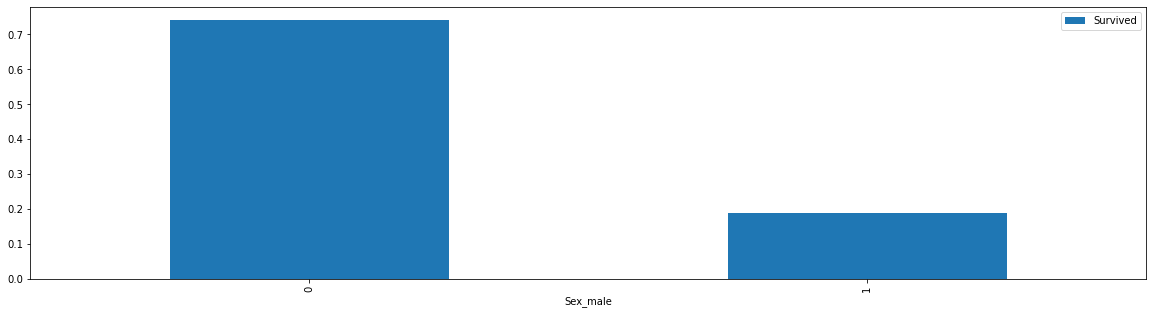

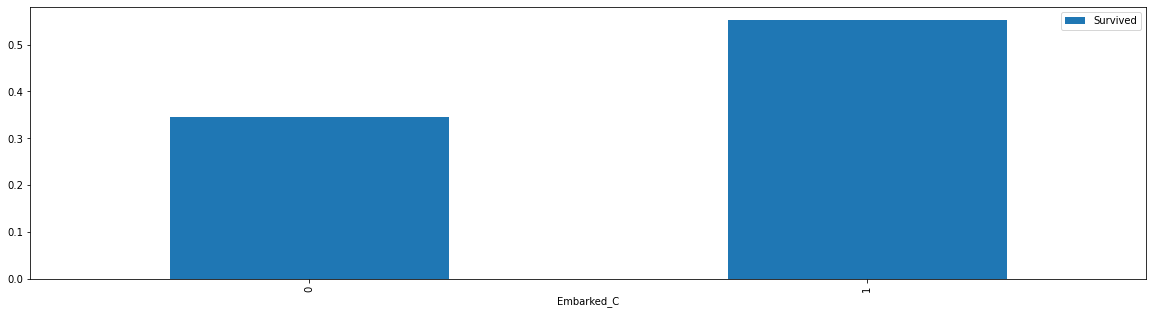

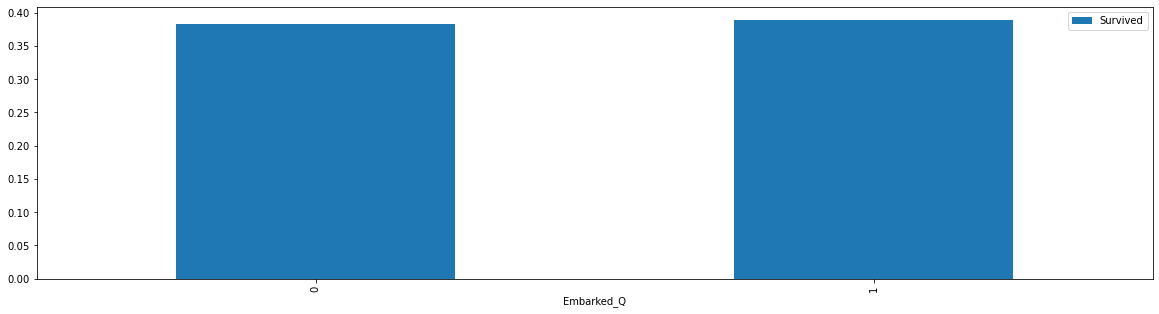

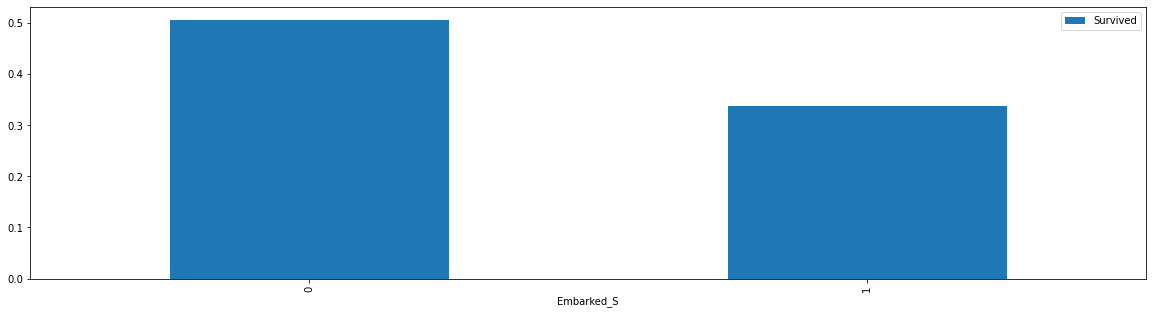

In [37]:
#Age и Fare нецелые - можно округлить
for col in df_train_4.columns[1:]:
    df_train_4.groupby(col)[['Survived']].mean().plot.bar(figsize=(20,5));

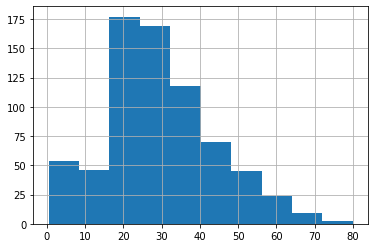

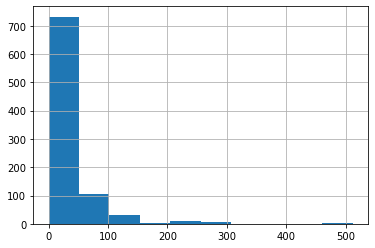

In [39]:
df_train['Age'].hist();
plt.show()
df_train['Fare'].hist();

In [40]:
#Округление Age и Fare
df_train_4['Age'] = df_train['Age'].apply(lambda x: 10 * (x // 10) + 5)
df_train_4['Fare'] = df_train['Fare'].apply(lambda x: 10 * (int(x) // 10) + 5)

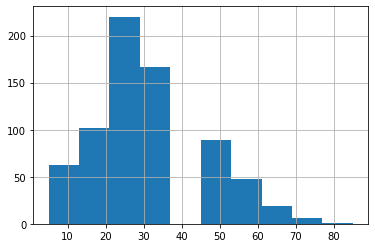

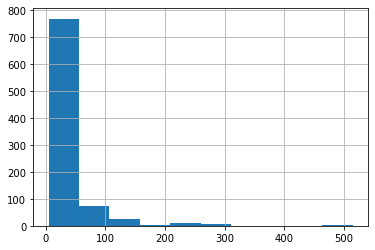

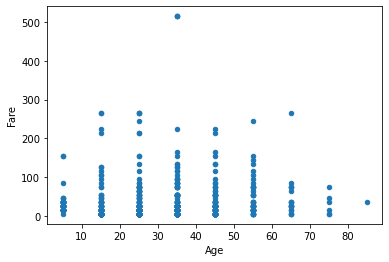

In [41]:
df_train_4['Age'].hist();
plt.show()
df_train_4['Fare'].hist();
plt.show()
df_train_4.plot.scatter('Age', 'Fare');

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


'ROC-AUC = 78.33%'

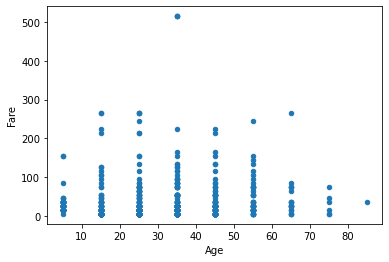

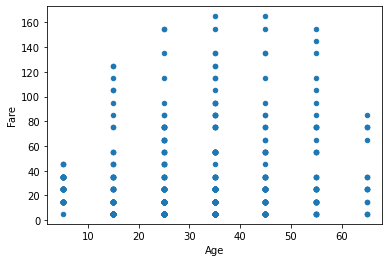

In [50]:
lst_6_1 = [i for i in df_train.columns if str(df_train[i].dtype) == 'object' 
           and i not in ('Ticket', 
                         'Name', 
                         'Cabin'#, 
                         #'Embarked' # Не удаляется, т.к. без неё модель хуже
                        )]
lst_6_2 = [i for i in df_train.columns if str(df_train[i].dtype) != 'object'][1:]

df_train_6 = df_train[lst_6_2].join(
    pd.get_dummies(
        df_train[lst_6_1]
    )).fillna(
    dct_metrics['Среднее']
).query('Fare < 200 and Age < 71 and not (Age < 10 and Fare > 75)')

#Округление Age и Fare
df_train_6['Age'] = df_train_6['Age'].apply(lambda x: 10 * (x // 10) + 5)
df_train_6['Fare'] = df_train_6['Fare'].apply(lambda x: 10 * (int(x) // 10) + 5)

x_train, x_test, y_train, y_test = train_test_split(
    df_train_6[list(df_train_6.columns)[1:]],
    df_train_6['Survived'], 
    test_size = 0.2, random_state=42)

model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

ROCS['corr_complex_manipulation'] = roc_auc_score(y_test, y_pred)

f'ROC-AUC = {roc_auc_score(y_test, y_pred):.2%}'

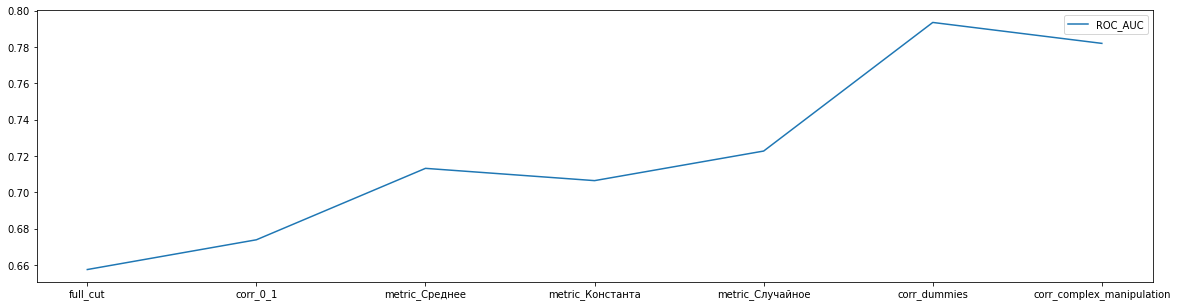

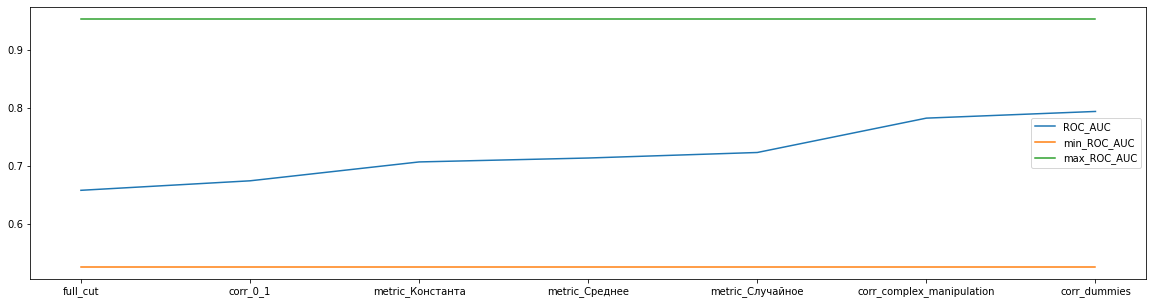

In [49]:
df_Bar = pd.DataFrame.from_dict(ROCS, orient='index', dtype=None, columns=None).rename(columns={0:'ROC_AUC'})

df_Bar.plot(figsize=(20,5))


df_Bar['min_ROC_AUC'] = df_Bar.ROC_AUC.min() * 0.8

df_Bar['max_ROC_AUC'] = df_Bar.ROC_AUC.max() * 1.2


df_Bar.sort_values(by='ROC_AUC').plot(figsize=(20,5));

In [ ]:
Для финальной модели сделаны следующие преобразования:
Категорийные переменные преобразованы в числовые - показатели не выкидывались, т.к. без них модель ухудшается,
Неизвестный возраст заполнен средним возрастом,
Удалены выбросы по 2м показателям Fare и Age,
Fare и Age приведены к средним за десятилетие.

В итоге - все модели показали качество ROC_AUC выше 65%,
но дополнительные обработки точность модели повышали.
79% показала обработка с заполнением пропущенного возраста средним и переводом категорийных переменных в числовые.
Комплексная обработка показала почти такую же точность (ниже на 1 п.п.)

Пока что ни один датасет не достиг качества выше 85%.

*Большие данные дополнять уже не очень целесообразно, т.к. пропуски играют меньшую роль.
Но можно попробовать, т.к. python это позволяет сделать быстро.
С другой стороны, на примере сравнения моделей заполнения метрики - разные варианты преобразования датасета 
можно проверять в цикле.

In [58]:
for key, val in ROCS.items():
    print(f'{key:25}: {val:.2%}')

full_cut                 : 65.74%
corr_0_1                 : 67.38%
metric_Среднее           : 71.31%
metric_Константа         : 70.64%
metric_Случайное         : 72.27%
corr_dummies             : 79.34%
corr_complex_manipulation: 78.33%
